In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(15,10)
from IPython.display import display # Allows the use of display() for DataFrames

In [2]:

dataset=pd.read_csv("Bengaluru_House_Data.csv")
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
print(dataset.isnull().sum()) #null values in features
dataset.shape

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


(13320, 9)

# Observation

# 1-we can drop society column because half of them is missing 
## 2-availability can also be dropeed as it doesnt have any directg relation as if now on price

In [4]:
df1=dataset.drop(['society','availability'],axis='columns')

# Removing duplicate values in size

In [5]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [6]:
#Removing Duplicate values
df1['size'][df1['size']=='3 Bedroom']='3 BHK'
df1['size'][df1['size']=='6 Bedroom']='6 BHK'
df1['size'][df1['size']=='1 Bedroom']='1 BHK'
df1['size'][df1['size']=='8 Bedroom']='8 BHK'
df1['size'][df1['size']=='2 Bedroom']='2 BHK'
df1['size'][df1['size']=='1 RK']='1 BHK'
df1['size'][df1['size']=='7 Bedroom']='7 BHK'
df1['size'][df1['size']=='5 Bedroom']='5 BHK'
df1['size'][df1['size']=='9 Bedroom']='9 BHK'
df1['size'][df1['size']=='10 Bedroom']='10 BHK'
df1['size'][df1['size']=='11 Bedroom']='11 BHK'
df1['size'][df1['size']=='12 Bedroom']='12 BHK'
df1['size'][df1['size']=='43 Bedroom']='43 BHK'
df1['size'][df1['size']=='18 Bedroom']='18 BHK'
df1['size'][df1['size']=='4 Bedroom']='4 BHK'

C:\Users\abdur\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\abdur\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\abdur\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\abdur\Anaconda3\lib\

In [7]:
df1['size'].unique()

array(['2 BHK', '4 BHK', '3 BHK', '6 BHK', '1 BHK', '8 BHK', '7 BHK',
       '5 BHK', '11 BHK', '9 BHK', nan, '27 BHK', '10 BHK', '19 BHK',
       '16 BHK', '43 BHK', '14 BHK', '12 BHK', '13 BHK', '18 BHK'],
      dtype=object)

In [8]:
display(df1[df1['size']=='27 BHK'])
display(df1[df1['size']=='43 BHK'])
#outlier detected

,area_type,location,size,total_sqft,bath,balcony,price
1718,Super built-up Area,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0


,area_type,location,size,total_sqft,bath,balcony,price
4684,Plot Area,Munnekollal,43 BHK,2400,40.0,0.0,660.0


# Exploratory Data Analysis

In [9]:
#without missing values
df1.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [10]:
edf1=df1.loc[df1['size'].isnull()==False]#After exiting the missing values
edf1=edf1.loc[edf1['location'].isnull()==False]#After exiting the missing values
edf1=edf1.loc[edf1['bath'].isnull()==False]#After exiting the missing values
edf1=edf1.loc[edf1['balcony'].isnull()==False]#After exiting the missing values

In [11]:
def stoi(a):
    a=str(a)
    b=a.split(" ")
    return int(b[0])

In [12]:
edf1['size']=list(map(stoi,edf1['size']))
edf1.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200,2.0,1.0,51.00


In [13]:
edf1.isnull().sum()
edf1.shape

(12710, 7)

In [14]:
edf1.columns

Index(['area_type', 'location', 'size', 'total_sqft', 'bath', 'balcony',
       'price'],
      dtype='object')

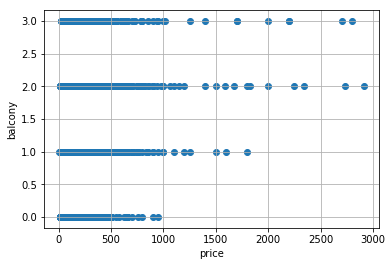

In [15]:
plt.scatter(edf1['price'],edf1['balcony'])
plt.xlabel('price')
plt.ylabel('balcony')
plt.grid()

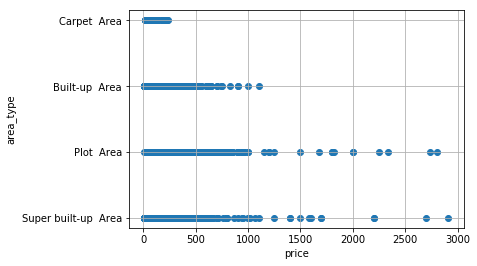

In [16]:
plt.scatter(edf1['price'],edf1['area_type'])
plt.xlabel('price')
plt.ylabel('area_type')
plt.grid()

# Observation
## The price depends directly on these factors
## 1-on  number of  balcony 
## 2-type of area you want to book a plot

# Data cleaning and filling missing values

In [17]:
df1.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

# Filling the missing values 

# location column with mod i.e with most number of occurence

In [18]:
df1['location'].value_counts()

Whitefield                                         540
Sarjapur  Road                                     399
Electronic City                                    302
Kanakpura Road                                     273
Thanisandra                                        234
Yelahanka                                          213
Uttarahalli                                        186
Hebbal                                             177
Marathahalli                                       175
Raja Rajeshwari Nagar                              171
Bannerghatta Road                                  152
Hennur Road                                        152
7th Phase JP Nagar                                 149
Haralur Road                                       142
Electronic City Phase II                           132
Rajaji Nagar                                       107
Chandapura                                         100
Bellandur                                           96
KR Puram  

In [19]:
df1['location']=df1['location'].fillna('Whitefield')

In [20]:
df1['location'].value_counts()

Whitefield                                         541
Sarjapur  Road                                     399
Electronic City                                    302
Kanakpura Road                                     273
Thanisandra                                        234
Yelahanka                                          213
Uttarahalli                                        186
Hebbal                                             177
Marathahalli                                       175
Raja Rajeshwari Nagar                              171
Bannerghatta Road                                  152
Hennur Road                                        152
7th Phase JP Nagar                                 149
Haralur Road                                       142
Electronic City Phase II                           132
Rajaji Nagar                                       107
Chandapura                                         100
Bellandur                                           96
KR Puram  

## Size column with mod i.e.with most number of occurence

In [21]:
df1['size'].value_counts()

2 BHK     5528
3 BHK     4857
4 BHK     1417
1 BHK      656
5 BHK      356
6 BHK      221
7 BHK      100
8 BHK       89
9 BHK       54
10 BHK      14
11 BHK       4
16 BHK       1
27 BHK       1
13 BHK       1
18 BHK       1
14 BHK       1
19 BHK       1
12 BHK       1
43 BHK       1
Name: size, dtype: int64

In [22]:
 df1['size']=df1['size'].fillna('2 BHK')

In [23]:
df1['size'].value_counts()

2 BHK     5544
3 BHK     4857
4 BHK     1417
1 BHK      656
5 BHK      356
6 BHK      221
7 BHK      100
8 BHK       89
9 BHK       54
10 BHK      14
11 BHK       4
16 BHK       1
27 BHK       1
13 BHK       1
18 BHK       1
14 BHK       1
19 BHK       1
12 BHK       1
43 BHK       1
Name: size, dtype: int64

## Converting the size of flat into int as it has direct effect on price

In [24]:
df1['size']=list(map(stoi,df1['size']))
df1.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200,2.0,1.0,51.00


In [25]:
df1.describe()

,size,bath,balcony,price
count,13320.000000,13247.000000,12711.000000,13320.000000
mean,2.802778,2.692610,1.584376,112.565627
std,1.294496,1.341458,0.817263,148.971674
min,1.000000,1.000000,0.000000,8.000000
25%,2.000000,2.000000,1.000000,50.000000
50%,3.000000,2.000000,2.000000,72.000000
75%,3.000000,3.000000,2.000000,120.000000
max,43.000000,40.000000,3.000000,3600.000000


# Missing values for bath and balcony checking with mean and mode

In [26]:
df2=df1.copy()
type(df2)

pandas.core.frame.DataFrame

In [27]:
df2['bath']=df2['bath'].fillna(2.692610)
df2['balcony']=df2['balcony'].fillna(1.584376)

## 1-Checking the effect on dataset after filling with mean 

In [28]:
df2.describe()

,size,bath,balcony,price
count,13320.000000,13320.000000,13320.000000,13320.000000
mean,2.802778,2.692610,1.584376,112.565627
std,1.294496,1.337777,0.798360,148.971674
min,1.000000,1.000000,0.000000,8.000000
25%,2.000000,2.000000,1.000000,50.000000
50%,3.000000,2.000000,2.000000,72.000000
75%,3.000000,3.000000,2.000000,120.000000
max,43.000000,40.000000,3.000000,3600.000000


## Observation
### 1-As there is no change in overall mean with filling of missing values with mean we dont check with mode
### now final check for missing values

In [29]:
df1=df2.copy()
del(df2)
df1.isnull().sum()


area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

# Analysis of total sq ft column

In [30]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

#### checking various variation in total_sqft feature 

In [31]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [32]:
df1[~df1['total_sqft'].apply(is_float)].head(15)

,area_type,location,size,total_sqft,bath,balcony,price
30,Super built-up Area,Yelahanka,4,2100 - 2850,4.00000,0.000000,186.000
56,Built-up Area,Devanahalli,4,3010 - 3410,2.69261,1.584376,192.000
81,Built-up Area,Hennur Road,4,2957 - 3450,2.69261,1.584376,224.500
122,Super built-up Area,Hebbal,4,3067 - 8156,4.00000,0.000000,477.000
137,Super built-up Area,8th Phase JP Nagar,2,1042 - 1105,2.00000,0.000000,54.005
165,Super built-up Area,Sarjapur,2,1145 - 1340,2.00000,0.000000,43.490
188,Super built-up Area,KR Puram,2,1015 - 1540,2.00000,0.000000,56.800
224,Super built-up Area,Devanahalli,3,1520 - 1740,2.69261,1.584376,74.820
410,Super built-up Area,Kengeri,1,34.46Sq. Meter,1.00000,0.000000,18.500
549,Super built-up Area,Hennur Road,2,1195 - 1440,2.00000,0.000000,63.770


## Observation
### 1-there are range of values so we'll use mean of upper limit and lower limit to fill it
### 2-there are values in sq m,perch etc. we ll just ignore rows with such values to make less sophisticated values

In [33]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [34]:
df2=df1.copy()

In [35]:
df2['total_sqft']=df2['total_sqft'].apply(convert_sqft_to_num)
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00


In [36]:
df2.loc[30]

area_type     Super built-up  Area
location                 Yelahanka
size                             4
total_sqft                    2475
bath                             4
balcony                          0
price                          186
Name: 30, dtype: object

In [37]:
df2.loc[410]

area_type     Super built-up  Area
location                   Kengeri
size                             1
total_sqft                     NaN
bath                             1
balcony                          0
price                         18.5
Name: 410, dtype: object

In [38]:
df2.isnull().sum()

area_type      0
location       0
size           0
total_sqft    46
bath           0
balcony        0
price          0
dtype: int64

In [39]:
df2.describe()

,size,total_sqft,bath,balcony,price
count,13320.000000,13274.000000,13320.000000,13320.000000,13320.000000
mean,2.802778,1559.626694,2.692610,1.584376,112.565627
std,1.294496,1238.405258,1.337777,0.798360,148.971674
min,1.000000,1.000000,1.000000,0.000000,8.000000
25%,2.000000,1100.000000,2.000000,1.000000,50.000000
50%,3.000000,1276.000000,2.000000,2.000000,72.000000
75%,3.000000,1680.000000,3.000000,2.000000,120.000000
max,43.000000,52272.000000,40.000000,3.000000,3600.000000


## Observation
### 1-we overcomed the range problems but because of ignoring values with porch and square meter  46 new null values have arrived which we will fill with the mean

In [40]:
df2['total_sqft']=df2['total_sqft'].fillna(1559.626694)

In [41]:
df2.isnull().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

# Feature Engineering

In [42]:
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00


In [43]:
#we know price pr square ft is very important  therefore we add new column pric pr squareft
df3=df2.copy()
df3['price_sq_ft']=df3['price']*100000/df3['total_sqft']
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,price_sq_ft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000


# Exploring Location featur

In [44]:
len(df3['location'].unique())

1305

## Observation
### 1-we cannot convert it using one hot encoder because it will create nearly 1304 columns so its kind high dimensionality problem
### 2- well use 'other' value for locations having only 1 points

In [45]:
df3['location']=df3['location'].apply(lambda x: x.strip())
location_stats=df3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield                                      542
Sarjapur  Road                                  399
Electronic City                                 304
Kanakpura Road                                  273
Thanisandra                                     237
Yelahanka                                       213
Uttarahalli                                     186
Hebbal                                          177
Marathahalli                                    175
Raja Rajeshwari Nagar                           171
Bannerghatta Road                               152
Hennur Road                                     152
7th Phase JP Nagar                              149
Haralur Road                                    142
Electronic City Phase II                        132
Rajaji Nagar                                    107
Chandapura                                      100
Bellandur                                        96
KR Puram                                         91
Ele

### Any location which has less then 10 data points will come under category 'others'

In [46]:
len(location_stats[location_stats<=10])

1053

### there are 1053 location which has less then 10 data points out of 1294 which is pretty good

In [47]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Nagadevanahalli                                 10
Sector 1 HSR Layout                             10
Basapura                                        10
Dodsworth Layout                                10
Naganathapura                                   10
Kalkere                                         10
Nagappa Reddy Layout                            10
Sadashiva Nagar                                 10
Ganga Nagar                                     10
BTM 1st Stage                                   10
Gunjur Palya                                    10
Dairy Circle                                    10
1st Block Koramangala                           10
KUDLU MAIN ROAD                                  9
Lingarajapuram                                   9
Kamakshipalya                                    9
Vignana Nagar                                    9
Gollahalli                                       9
Kaverappa Layout                                 9
Peenya                

In [48]:
len(df3['location'].unique())

1294

In [49]:
df3['location']=df3['location'].apply(lambda x: 'others' if x in location_stats_less_than_10 else x)

In [50]:
len(df3['location'].unique())

242

In [51]:
df3.head(10)

,area_type,location,size,total_sqft,bath,balcony,price,price_sq_ft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.000000,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.000000,120.00,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.000000,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.000000,95.00,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.000000,51.00,4250.000000
5,Super built-up Area,Whitefield,2,1170.0,2.0,1.000000,38.00,3247.863248
6,Super built-up Area,Old Airport Road,4,2732.0,4.0,1.584376,204.00,7467.057101
7,Super built-up Area,Rajaji Nagar,4,3300.0,4.0,1.584376,600.00,18181.818182
8,Super built-up Area,Marathahalli,3,1310.0,3.0,1.000000,63.25,4828.244275
9,Plot Area,others,6,1020.0,6.0,1.584376,370.00,36274.509804


### Succesful dimensionality reduction when we use one hot encoding for categorical features 

# Outlier detection and removal

In [52]:
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,price_sq_ft
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.0,39.07,3699.810606
1,Plot Area,Chikka Tirupathi,4,2600.0,5.0,3.0,120.00,4615.384615
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.0,62.00,4305.555556
3,Super built-up Area,Lingadheeranahalli,3,1521.0,3.0,1.0,95.00,6245.890861
4,Super built-up Area,Kothanur,2,1200.0,2.0,1.0,51.00,4250.000000


## Assumptions
### 1- We assume that the minimum threshold for a romm is 300 sq_ft

In [53]:
print(df3.shape)
print(df3[df3['total_sqft']/df3['size']<300].shape)
df3[df3['total_sqft']/df3['size']<300].head()


(13320, 8)
(748, 8)


,area_type,location,size,total_sqft,bath,balcony,price,price_sq_ft
9,Plot Area,others,6,1020.0,6.0,1.584376,370.0,36274.509804
45,Plot Area,HSR Layout,8,600.0,9.0,1.584376,200.0,33333.333333
58,Plot Area,Murugeshpalya,6,1407.0,4.0,1.000000,150.0,10660.980810
68,Plot Area,Devarachikkanahalli,8,1350.0,7.0,0.000000,85.0,6296.296296
70,Plot Area,others,3,500.0,3.0,2.000000,100.0,20000.000000


### 2- 748 outlier we going to remove them 

In [54]:
df4=df3[~(df3['total_sqft']/df3['size']<300)]
df4.shape

(12572, 8)

## Outlier in price per sqft 

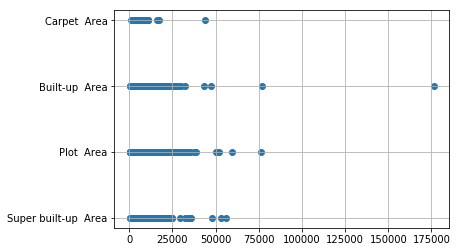

In [55]:
plt.scatter(df4['price_sq_ft'],df4['area_type'])
plt.grid()

In [56]:
df4['price_sq_ft'].describe()

count     12572.000000
mean       6312.185150
std        4177.946702
min         267.829813
25%        4209.344773
50%        5294.736984
75%        6927.325006
max      176470.588235
Name: price_sq_ft, dtype: float64

In [57]:
def remove_pps_outlier(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_sq_ft)
        st=np.std(subdf.price_sq_ft)
        reduced_df=subdf[(subdf['price_sq_ft']>(m-st)) & (subdf['price_sq_ft']<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
        

In [58]:
df5=remove_pps_outlier(df4)
df5.shape

(10349, 8)

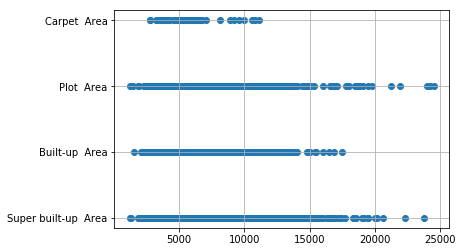

In [59]:
plt.scatter(df5['price_sq_ft'],df5['area_type'])
plt.grid()

In [60]:
df5.describe()

,size,total_sqft,bath,balcony,price,price_sq_ft
count,10349.000000,10349.000000,10349.000000,10349.000000,10349.000000,10349.000000
mean,2.575321,1508.888213,2.476161,1.591230,91.412062,5665.577929
std,0.898316,879.687376,0.979370,0.783077,86.350470,2276.383149
min,1.000000,300.000000,1.000000,0.000000,10.000000,1250.000000
25%,2.000000,1110.000000,2.000000,1.000000,49.000000,4242.424242
50%,2.000000,1290.000000,2.000000,2.000000,67.000000,5176.565008
75%,3.000000,1650.000000,3.000000,2.000000,100.000000,6439.393939
max,16.000000,30400.000000,16.000000,3.000000,2200.000000,24509.803922


## Plotting the size with 2BHK and 3BHK with almost same total_sqft but the price for 2BHK is higher in some  cases so we find all those points

In [61]:
df5[(df5['location']=='Rajaji Nagar') & ((df5['total_sqft']>1700) & (df5['total_sqft']<1800))]

,area_type,location,size,total_sqft,bath,balcony,price,price_sq_ft
5784,Super built-up Area,Rajaji Nagar,3,1725.0,3.0,3.0,200.0,11594.202899
5797,Super built-up Area,Rajaji Nagar,2,1718.0,3.0,2.0,288.0,16763.678696
5817,Super built-up Area,Rajaji Nagar,3,1776.0,3.0,1.0,190.0,10698.198198
5819,Super built-up Area,Rajaji Nagar,2,1763.0,3.0,2.0,262.0,14861.032331
5836,Super built-up Area,Rajaji Nagar,3,1720.0,3.0,2.0,224.0,13023.255814
5845,Super built-up Area,Rajaji Nagar,2,1718.0,3.0,2.0,275.0,16006.984866
5846,Super built-up Area,Rajaji Nagar,2,1763.0,3.0,2.0,240.0,13613.159387


In [62]:
df5[(df5['location']=='Hebbal') & ((df5['total_sqft']>1250) & (df5['total_sqft']<1500))].head(10)

,area_type,location,size,total_sqft,bath,balcony,price,price_sq_ft
2817,Super built-up Area,Hebbal,2,1349.0,2.0,1.0,98.20,7279.466271
2822,Super built-up Area,Hebbal,2,1337.0,2.0,1.0,82.00,6133.133882
2823,Super built-up Area,Hebbal,2,1349.0,2.0,1.0,98.00,7264.640474
2824,Super built-up Area,Hebbal,3,1255.0,2.0,1.0,77.68,6189.641434
2825,Super built-up Area,Hebbal,3,1355.0,3.0,1.0,83.87,6189.667897
2837,Super built-up Area,Hebbal,3,1255.0,2.0,1.0,77.68,6189.641434
2839,Super built-up Area,Hebbal,2,1420.0,2.0,1.0,123.00,8661.971831
2841,Super built-up Area,Hebbal,2,1420.0,2.0,1.0,99.39,6999.295775
2845,Super built-up Area,Hebbal,2,1420.0,2.0,1.0,99.39,6999.295775
2846,Super built-up Area,Hebbal,3,1355.0,3.0,1.0,83.87,6189.667897


## Observation
### 1-here it is clear the change in price doesnt depend on the area type as they all are built in same area

In [63]:
def plot_scatter_chart(df,location):
    bhk2=df[(df['location']==location) & (df['size']==2)]
    bhk3=df[(df['location']==location) & (df['size']==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2['total_sqft'],bhk2['price'],color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3['total_sqft'],bhk3['price'],marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel('Total square ft area')
    plt.ylabel('Price pr square ft')
    plt.title(location)
    plt.legend()

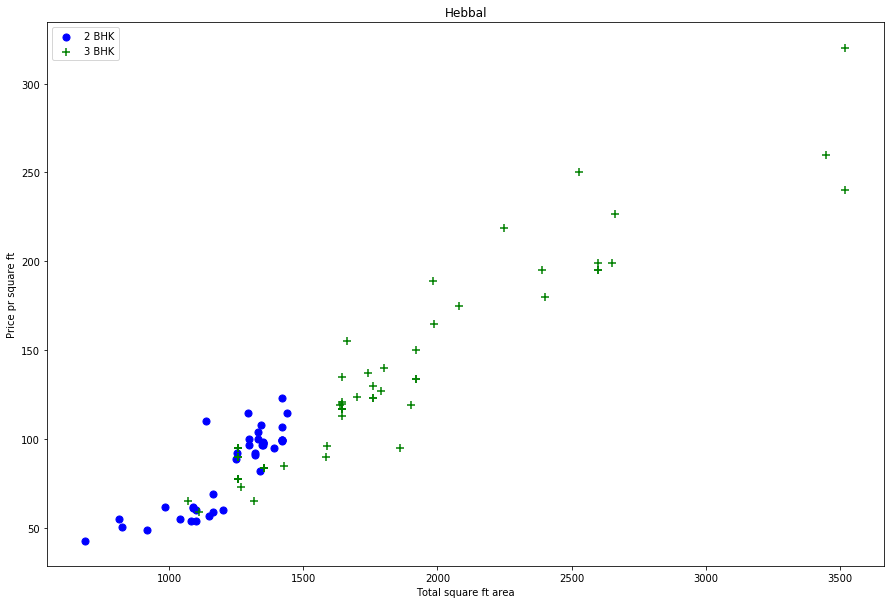

In [64]:
plot_scatter_chart(df5,"Hebbal")

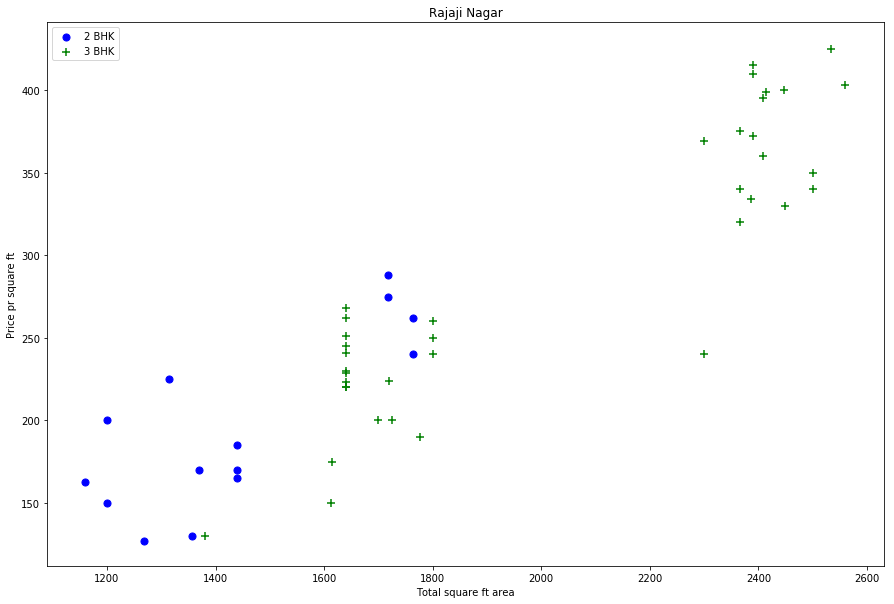

In [65]:
plot_scatter_chart(df5,"Rajaji Nagar")

## Observaton
### 1- here in graph there are many such points for different location eg Rajaji nagar,Hebbal etc

### we should  also remove properties  where  for same location the price(for example) 3 bedroom  apartment  is less than 2 bedroom apartment (with same  square ft area).What we will do is for a given location ,we will build a dictionary of stats per bhk, ie.

### Now we can remove those 2bhk apartment  whose price pr sqft is less than mean price per sq ft of 1bhk apartment

In [66]:
def remove_bhk_outlier(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for size,size_df in location_df.groupby('size'):
            bhk_stats[size]={
                'mean' : np.mean(size_df.price_sq_ft),
                'std' : np.std(size_df.price_sq_ft),
                'count' : size_df.shape[0]
            }
        for size,size_df in location_df.groupby('size'):
            stats=bhk_stats.get(size-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,size_df[size_df.price_sq_ft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [67]:
df6=remove_bhk_outlier(df5)
df6.shape

(7378, 8)

### now we again do the same scatter plot to check change in  dataset

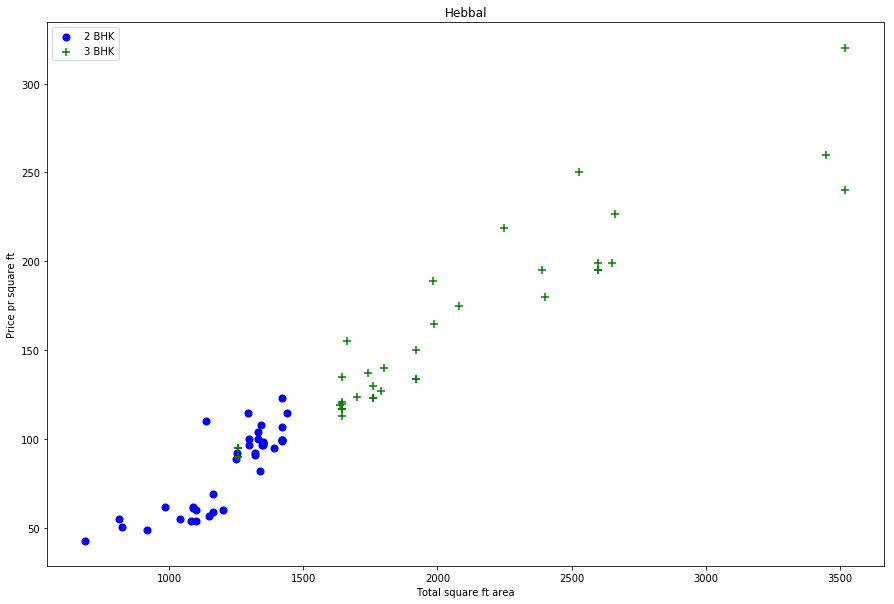

In [68]:
plot_scatter_chart(df6,"Hebbal")

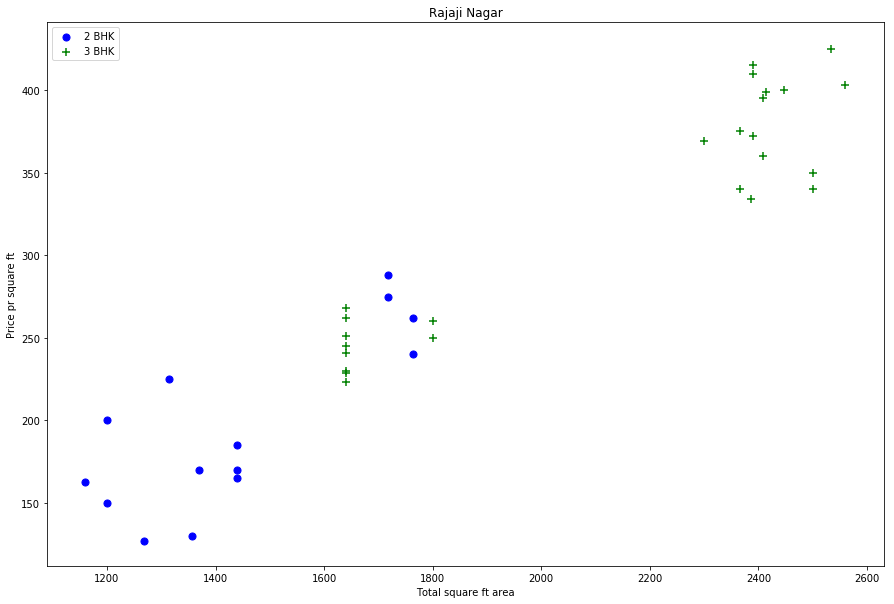

In [69]:
plot_scatter_chart(df6,"Rajaji Nagar")

### Outlier removed  

# Plotting a histogram to see how many numbers of apartment i have in price pr sqaure ft 

Text(0, 0.5, 'count')

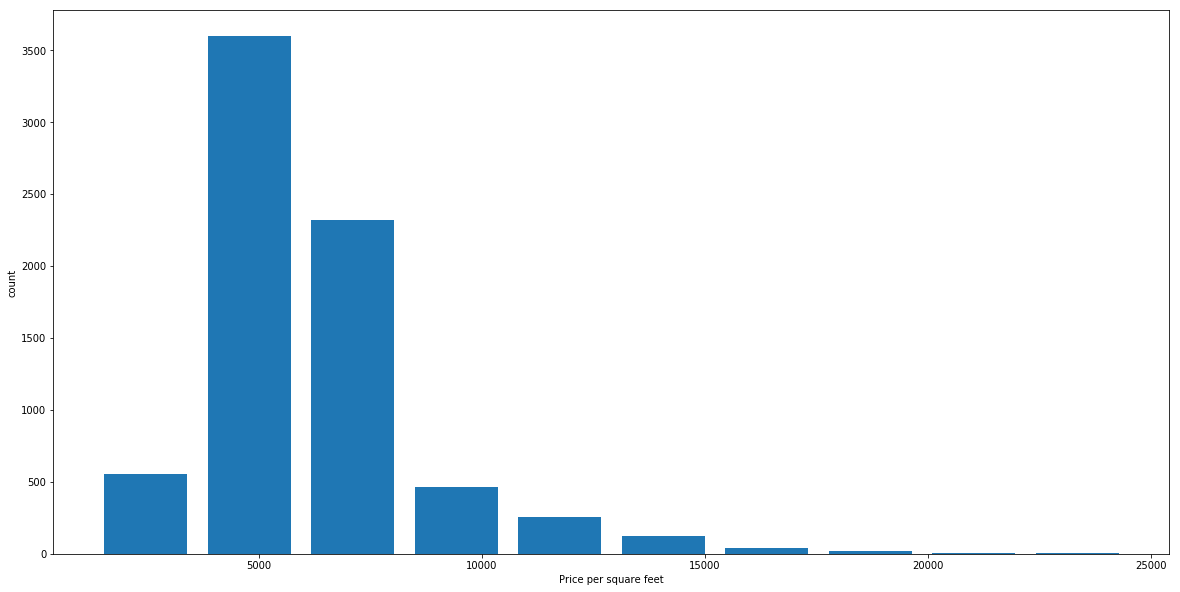

In [70]:
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df6['price_sq_ft'],rwidth=0.8)
plt.xlabel('Price per square feet')
plt.ylabel('count')

### 0 to 10000  price square feet we have a majority point of data

# Now exploring  bathroom feature

In [71]:
df6.bath.unique()

array([ 4.     ,  3.     ,  2.     ,  5.     ,  8.     ,  1.     ,
        6.     ,  2.69261,  7.     ,  9.     , 12.     , 16.     ,
       13.     ])

In [72]:
df6[df6.bath>10]

,area_type,location,size,total_sqft,bath,balcony,price,price_sq_ft
5333,Super built-up Area,Neeladri Nagar,10,4000.0,12.0,1.584376,160.0,4000.000000
8579,Super built-up Area,others,10,12000.0,12.0,1.584376,525.0,4375.000000
8669,Super built-up Area,others,16,10000.0,16.0,1.584376,550.0,5500.000000
9406,Super built-up Area,others,11,6000.0,12.0,1.584376,150.0,2500.000000
9739,Super built-up Area,others,13,5425.0,13.0,0.000000,275.0,5069.124424


### so by normal analysis we assume that more than plus 2 to number of bedroom number of bathroom are an outlier (we plot a histogram to have a clear visual of it) 

Text(0, 0.5, 'count')

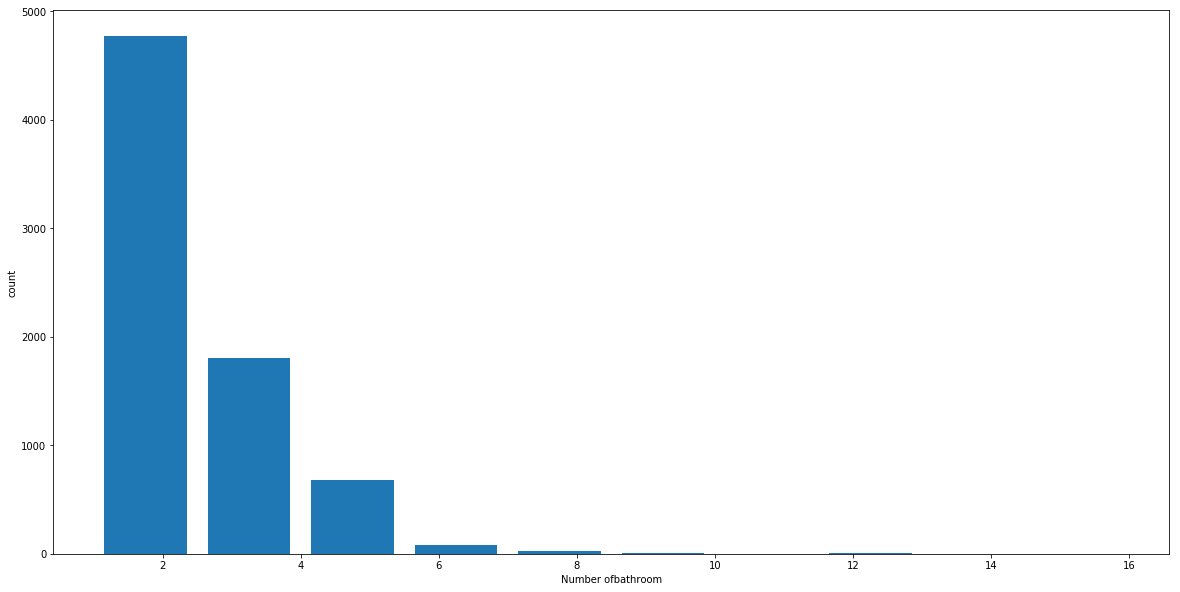

In [73]:
plt.hist(df6['bath'],rwidth=0.8)
plt.xlabel('Number ofbathroom')
plt.ylabel('count')

In [74]:
df6[(df6['bath'])>(df6['size']+2)]

,area_type,location,size,total_sqft,bath,balcony,price,price_sq_ft
1640,Built-up Area,Chikkabanavar,4,2460.0,7.0,2.000000,80.0,3252.032520
5294,Built-up Area,Nagasandra,4,7000.0,8.0,1.584376,450.0,6428.571429
6786,Super built-up Area,Thanisandra,3,1806.0,6.0,2.000000,116.0,6423.034330
8503,Super built-up Area,others,6,11338.0,9.0,1.000000,1000.0,8819.897689


In [75]:
df6.shape

(7378, 8)

In [76]:
df7=df6[(df6['bath'])<=(df6['size']+2)]
df7.shape

(7374, 8)

In [77]:
df7[df7['balcony']>(df7['size'])+1]


,area_type,location,size,total_sqft,bath,balcony,price,price_sq_ft


# Now we can remove price_sq_ft as it was used only for outlier detection

In [78]:
df7=df7.drop(['price_sq_ft'],axis='columns')

In [79]:
df7.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,1st Block Jayanagar,4,2850.0,4.0,1.0,428.0
1,Super built-up Area,1st Block Jayanagar,3,1630.0,3.0,2.0,194.0
2,Super built-up Area,1st Block Jayanagar,3,1875.0,2.0,3.0,235.0
3,Built-up Area,1st Block Jayanagar,3,1200.0,2.0,0.0,130.0
4,Super built-up Area,1st Block Jayanagar,2,1235.0,2.0,2.0,148.0


# Model Building

## Handling the categorical values 

In [80]:
df7.head(5)

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,1st Block Jayanagar,4,2850.0,4.0,1.0,428.0
1,Super built-up Area,1st Block Jayanagar,3,1630.0,3.0,2.0,194.0
2,Super built-up Area,1st Block Jayanagar,3,1875.0,2.0,3.0,235.0
3,Built-up Area,1st Block Jayanagar,3,1200.0,2.0,0.0,130.0
4,Super built-up Area,1st Block Jayanagar,2,1235.0,2.0,2.0,148.0


In [81]:
dummies=pd.get_dummies(df7.location)
dummies2=pd.get_dummies(df7.area_type)
dummies.head(5)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
df8=pd.concat([df7,dummies.drop('others',axis='columns')],axis='columns')
df8.head()

,area_type,location,size,total_sqft,bath,balcony,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Super built-up Area,1st Block Jayanagar,4,2850.0,4.0,1.0,428.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Super built-up Area,1st Block Jayanagar,3,1630.0,3.0,2.0,194.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Super built-up Area,1st Block Jayanagar,3,1875.0,2.0,3.0,235.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Built-up Area,1st Block Jayanagar,3,1200.0,2.0,0.0,130.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Super built-up Area,1st Block Jayanagar,2,1235.0,2.0,2.0,148.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
df9=pd.concat([df8,dummies2],axis='columns')
df9.head(5)

,area_type,location,size,total_sqft,bath,balcony,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,1st Block Jayanagar,4,2850.0,4.0,1.0,428.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Super built-up Area,1st Block Jayanagar,3,1630.0,3.0,2.0,194.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,Super built-up Area,1st Block Jayanagar,3,1875.0,2.0,3.0,235.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Built-up Area,1st Block Jayanagar,3,1200.0,2.0,0.0,130.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Super built-up Area,1st Block Jayanagar,2,1235.0,2.0,2.0,148.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [84]:
df10=df9.drop(['location','area_type'],axis='columns')
df10.head()

,size,total_sqft,bath,balcony,price,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,4,2850.0,4.0,1.0,428.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3,1630.0,3.0,2.0,194.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,1875.0,2.0,3.0,235.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,1200.0,2.0,0.0,130.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,1235.0,2.0,2.0,148.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [85]:
df10.shape

(7374, 250)

In [86]:
X=df10.drop('price',axis='columns')#feature matrix
X.head()

,size,total_sqft,bath,balcony,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,4,2850.0,4.0,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3,1630.0,3.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,1875.0,2.0,3.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,1200.0,2.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,2,1235.0,2.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [87]:
y=df10.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

## Linear Regression algorithm

In [89]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8367487985045172

## K-fold cross validation 

In [90]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv) 


array([0.86458048, 0.73489463, 0.86552296, 0.85463578, 0.77240166])

In [91]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params' : {
                'normalize': [True,False]
            }
        },
          'lasso':{
            'model':Lasso(),
            'params' : {
                'alpha': [1,2],
                'selection' : ['random','cyclic']
            }
        },
        'decision_tree' : {
            'model':DecisionTreeRegressor(),
            'params' : {
                    'criterion': ['mse','friedman_mse'],
                    'splitter' : ['best','random']
            }
        }
    }

    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [92]:
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.823458,{'normalize': True}
1,lasso,0.666552,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.731089,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


# Observation
# So linear Regression shows the best result with the best parameters as above i.e. 'normalize': True

In [93]:
X.columns

Index(['size', 'total_sqft', 'bath', 'balcony', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'Built-up  Area', 'Carpet  Area',
       'Plot  Area', 'Super built-up  Area'],
      dtype='object', length=249)

In [94]:
np.where(X.columns=='2nd Phase Judicial Layout')[0][0]

6

## Some pridiction using the above algo 

In [95]:
def predict_price(location,size,sqft,bath,balcony,area):
    loc_index=np.where(X.columns==location)[0][0]
    area_index=np.where(X.columns==area)[0][0]
    
    x=np.zeros(len(X.columns))
    
    x[0]=size
    x[1]=sqft
    x[2]=bath
    x[3]=balcony
    if loc_index>=0:
        x[loc_index]=1
    if area_index>=0:
        x[area_index]=1 
    
    return lr_clf.predict([x])[0]

In [96]:
predict_price('Electronic City Phase II',2,1056,2,1,'Super built-up  Area')

35.46674323972568

In [97]:
predict_price('Electronic City Phase II',3,1056,3,1,'Super built-up  Area')

37.721984719810365

In [98]:
predict_price('Electronic City Phase II',3,1056,3,2,'Carpet  Area')

35.33123182501063

In [99]:
predict_price('Indira Nagar',2,1056,2,1,'Super built-up  Area') #its pretty costly area in banglore

166.8334816899539

# Analysis
## 1-as we increase the number of  room or bathroom  the price increases which is correct asssumption
## 2- same all parameters but the area is change to carpet area and we have seen during the analysis that the carpet area have a less price then super built-up area
## 3-similarly for all the same pare=ameters but different location then also price effect
# So are model is predicting good

In [100]:
#finally exporting the model to  pickel file

import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)


In [101]:
import json
columns={
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))
